# Titanic Full Dataset
En este cuaderno, realizaremos la limpieza y transformación de datos del conjunto de datos del Titanic para prepararlo para un análisis más profundo. Nos enfocaremos en manejar valores faltantes, convertir formatos de datos y crear nuevas características relevantes.

## Titanic su historia
El RMS Titanic fue un transatlántico británico que se hundió en la madrugada del 15 de abril de 1912, después de chocar con un iceberg durante su viaje inaugural desde Southampton a Nueva York. Fue construido en su época como el barco de pasajeros más grande y lujoso del mundo, pero a pesar de su reputación de "insumergible", el desastre resultó en la muerte de más de 1,500 personas, convirtiéndolo en uno de los naufragios más mortales en tiempos de paz en la historia marítima. El Titanic era conocido por su lujo y tecnología avanzada para la época, pero también por la insuficiencia de botes salvavidas para todos los pasajeros y tripulación a bordo.

![imagen](https://www.worldhistory.org/uploads/images/14047.png)

**Detalles del naufragio**
* **Viaje inaugural**: El barco zarpó de Southampton, Inglaterra, el 10 de abril de 1912, con destino a Nueva York. 
* **Impacto**: La noche del 14 de abril de 1912, chocó con un iceberg a las 11:40 p.m., lo que provocó una brecha de casi 100 metros en su casco. 
* **Hundimiento**: El barco se hundió a las 2:20 a.m. del 15 de abril de 1912. A pesar de su diseño con 16 compartimentos estancos, la brecha afectó a cinco de ellos, lo que hizo que el barco no pudiera mantenerse a flote. 
* **Víctimas**: De las aproximadamente 2.224 personas a bordo (entre pasajeros y tripulación), murieron más de 1.500. 
* **Causas**: La colisión con el iceberg, la falta de botes salvavidas suficientes y la creencia errónea de que el barco era insumergible contribuyeron a la tragedia. 


## Titanic historia del conjunto de datos
El conjunto de datos Titanic Full Dataset proviene de la Encyclopedia Titanic (ET), una fuente exhaustiva de información sobre los pasajeros y la tripulación del RMS Titanic. Este conjunto de datos incluye detalles demográficos, información de supervivencia y otros datos relevantes para cada individuo a bordo del Titanic.


### Descripción de las variables del conjunto de datos Titanic Full Dataset:

| Variable       | Description |
|----------------|-------------|
| Name_ID        | Unique ID for Passenger / Crew member |
| Name           | Full Name (LAST, Title First) |
| Female         | Female indicator |
| Male           | Male indicator |
| Sex            | Sex (text, male/female) |
| Age            | Age, numeric (fractional - 10 months = 0.8333) |
| Class/Dept     | Text field for passenger class or crew department |
| Class          | Class of Passenger or Department of Crew - 1,2,3,B,D,E,R,V (see key) |
| Ticket         | Ticket number |
| Joined         | Port of embarcation |
| Occupation     | Job / Career |
| Boat [Body]    | Boat (rescued survivor), Body (identified victim) |
| Price          | Price of ticket, Pounds |
| Job            | Second field of career info / company, role, various |
| Survived       | Survived indicator |
| URL            | Encyclopedia Titanic URL filename (starts with http://www.encyclopedia-titanica.org) |
| Last           | Last Name |
| Title          | Title / Salutation |
| First          | First Name |
| DoB            | Date of birth if available |
| Year_Birth     | Year or Year/Month of birth if available |
| Date_Death     | Date of death |
| DoB_Clean      | Date of birth, cleaned, derived when only year or month/year of birth available, supplemented with values from "Age" variable if "DoB" or "Year_Birth" not available |
| Age_F_Code     | A code to indicate the method by which |
| Age_F          | Age "Final" - all ages for which any data exists, see "Age_F_Code" for how it was derived |
| sibsp          | Number of Siblings/Spouses Aboard - obtained from familiar "Titanic3" dataset, merged via "Name_ID" variable |
| parch          | Number of Parents/Children Aboard - obtained from familiar "Titanic3" dataset, merged via "Name_ID" variable |

#### Claves para identicar la clase (Class) o departamento (dept) de los pasajeros y tripulación:
| Class/Dept          | Class |
|----------------------|-------|
| 1st Class Passenger  | 1     |
| 2nd Class Passenger  | 2     |
| 3rd Class Passenger  | 3     |
| Deck Crew            | D     |
| Engineering Crew     | E     |
| Band                 | B     |
| Restaurant Staff     | R     |
| Victualling Crew     | V     |

#### Claves para edad (Age_F_Code) final del pasajero:
| Code | Description |
|------|-------------|
| D | Year and Month from ET, guessed day of month (15th) |
| M | Year only on ET, guessed birthday (June 30th) |
| C | Complete DoB from ET |
| A | Age but No DoB from ET |
| X | No data at all on ET |

ET = Encyclopedia Titanic (http://www.encyclopedia-titanica.org)

In [2]:
import pandas as pd
import numpy as np

In [3]:
dft = pd.read_csv('../data/titanic5_full.csv')
dft.head(3)

,Name_ID,Name,Female,Male,Sex,Age,Class/Dept,Class,Ticket,Joined,...,Title,First,DoB,Year_Birth,Date_Death,DoB_Clean,Age_F_Code,Age_F,sibsp,parch
0,531,"DEAN, Miss Elizabeth Gladys 'Millvina'",1,0,female,0.17,3rd Class Passenger,3,2315,Southampton,...,Miss,Elizabeth Gladys 'Millvina',2-02-1912,NaN,5-31-2009,2-02-1912,C,0.2,1.0,2.0
1,498,"DANBOM, Master Gilbert Sigvard Emanuel",0,1,male,0.33,3rd Class Passenger,3,347080,Southampton,...,Master,Gilbert Sigvard Emanuel,11-16-1911,NaN,4-15-1912,11-16-1911,C,0.0,0.0,2.0
2,1961,"TANNuS, Master As'ad",0,1,male,0.42,3rd Class Passenger,3,2625,Cherbourg,...,Master,As'ad,11-08-1911,NaN,6-12-1931,11-08-1911,C,0.0,0.0,1.0


In [23]:
# estructura del dataframe inicial
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2208 entries, 0 to 2207
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name_ID      2208 non-null   int64  
 1   Name         2208 non-null   object 
 2   Female       2208 non-null   int64  
 3   Male         2208 non-null   int64  
 4   Sex          2208 non-null   object 
 5   Age          2154 non-null   float64
 6   Class/Dept   2208 non-null   object 
 7   Class        2208 non-null   object 
 8   Ticket       1317 non-null   object 
 9   Joined       2208 non-null   object 
 10  Occupation   1587 non-null   object 
 11  Boat [Body]  2208 non-null   object 
 12  Price        2208 non-null   object 
 13  Job          958 non-null    object 
 14  Survived     2208 non-null   int64  
 15  URL          2208 non-null   object 
 16  Last         2208 non-null   object 
 17  Title        2208 non-null   object 
 18  First        2208 non-null   object 
 19  DoB   

In [30]:
dft.describe()

,Name_ID,Female,Male,Age,Survived,Age_F,sibsp,parch
count,2208.000000,2208.000000,2208.000000,2154.000000,2208.000000,2206.000000,1309.000000,1309.000000
mean,1104.500000,0.221467,0.778533,30.158770,0.322464,30.146963,0.498854,0.385027
std,637.539018,0.415328,0.415328,11.958248,0.467525,12.114540,1.041658,0.865560
min,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,552.750000,0.000000,1.000000,22.000000,0.000000,22.000000,0.000000,0.000000
50%,1104.500000,0.000000,1.000000,29.000000,0.000000,29.000000,0.000000,0.000000
75%,1656.250000,0.000000,1.000000,37.000000,1.000000,38.000000,1.000000,0.000000
max,2208.000000,1.000000,1.000000,71.000000,1.000000,74.000000,8.000000,9.000000


### Limpieza y transformación de datos

#### Fechas

In [ ]:
dft[['DoB','Year_Birth', 'DoB_Clean']]

In [24]:
# Convertir columnas a datetime (intenta parsear con distintos formatos)
cols = ['DoB', 'Date_Death', 'DoB_Clean']

for col in cols:
    if col in dft.columns:
        orig = dft[col]
        parsed = pd.to_datetime(orig, errors='coerce', infer_datetime_format=True)
        # Reintentar con dayfirst=True para los que siguen NaT pero no eran NaN originalmente
        need = parsed.isna() & orig.notna()
        if need.any():
            parsed2 = pd.to_datetime(orig[need], errors='coerce', dayfirst=False, infer_datetime_format=True)
            parsed.loc[need] = parsed2
        dft[col] = parsed
        print(f"{col}: {dft[col].notna().sum()} valores convertidos, {dft[col].isna().sum()} NaT")
    else:
        print(f"Columna no encontrada: {col}")

# Mostrar tipos resultantes
dft[ [c for c in cols if c in dft.columns] ].dtypes

DoB: 1231 valores convertidos, 977 NaT
Date_Death: 2087 valores convertidos, 121 NaT
DoB_Clean: 1853 valores convertidos, 355 NaT


/var/folders/n1/zsbrkfs97sd_4fdl4mnf21g00000gn/T/ipykernel_69144/3510257747.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(orig, errors='coerce', infer_datetime_format=True)
/var/folders/n1/zsbrkfs97sd_4fdl4mnf21g00000gn/T/ipykernel_69144/3510257747.py:11: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed2 = pd.to_datetime(orig[need], errors='coerce', dayfirst=False, infer_datetime_format=True)
/var/folders/n1/zsbrkfs97sd_4fdl4mnf21g00000gn/T/ipykernel_69144/3510257747.py:7: UserWarning: The argument 'infer_datetime_format' 

DoB           datetime64[ns]
Date_Death    datetime64[ns]
DoB_Clean     datetime64[ns]
dtype: object

In [25]:
dft[['DoB','Year_Birth', 'DoB_Clean']]

,DoB,Year_Birth,DoB_Clean
0,1912-02-02,NaN,1912-02-02
1,1911-11-16,NaN,1911-11-16
2,1911-11-08,NaN,1911-11-08
3,1911-08-29,NaN,1911-08-29
4,1911-09-08,NaN,1911-09-08
...,...,...,...
2203,1850-05-13,NaN,1850-05-13
2204,NaT,1889,1889-06-30
2205,1861-03-06,NaN,1861-03-06
2206,1890-06-06,NaN,1890-06-06


#### Transformando en precio (Price) a valor numérico
El campo 'Price' en el conjunto de datos Titanic Full Dataset representa el precio del boleto en libras esterlinas (£) pagado por cada pasajero para abordar el RMS Titanic. Este valor es crucial para analizar la relación entre el costo del boleto y la clase del pasajero, así como para estudiar patrones de supervivencia basados en factores socioeconómicos.

Para ello convertimos el campo 'Price' a un valor numérico, manejando adecuadamente los valores faltantes o no numéricos que puedan existir en el conjunto de datos.

In [26]:
# El precio esta en formato de libras inglesas en formato antiguo
dft['Price'].head(3)

0    £20 11s 6d
1        £14 8s
2     £8 10s 4d
Name: Price, dtype: object

In [12]:
def price_to_float(val):
    """
    Convierte precios en formato antiguo británico 
    (ej. '£20 11s 6d', '£35', '£7 4s 6d') 
    a un valor numérico en libras.
    """
    if pd.isna(val):
        return np.nan
    # Eliminar el símbolo de la libra
    val = val.replace('£', '')
    # Inicializar el total en libras
    total = 0
    # Dividir el valor en partes (libras, chelines y peniques)
    parts = val.split()
    for part in parts:
        if 's' in part:  # Chelines
            total += float(part.replace('s', '')) / 20
        elif 'd' in part:  # Peniques
            total += float(part.replace('d', '')) / 240
        else:  # Libras
            total += float(part)
    return total

# convertir la columna 'Price' a valores numéricos actuales
dft['Price'] = dft['Price'].apply(price_to_float).round(2)

#### Columnas a eliminar
La columna **Name_ID** es un identificador único para cada pasajero o miembro de la tripulación, lo que permite rastrear y analizar datos específicos relacionados con cada individuo a bordo del Titanic. Sin embargo, en este cuaderno nos centraremos en las variables más relevantes para nuestro análisis, como la edad, el sexo, la clase de pasajero y la supervivencia.

Eliminamos las columnas 'Female' y 'Male' ya que están representados en 'Sex' y en esta cambiamos los valores de 'Sex' en 0 y 1 para facilitar el análisis posterior. Quedando 1 para 'male' y 0 para 'female' como enteros.

Otros campos que no aportan al análisis serán eliminados en futuras etapas del proceso de limpieza y transformación de datos.
- **Name, First, Last**: Aunque proporciona información sobre el nombre completo del pasajero, no es relevante para nuestro análisis de supervivencia y demografía.
- **URL**: La URL de la Encyclopedia Titanic no es necesaria para nuestro análisis.

In [4]:
# Asegurarse de que `dft` sea un DataFrame; si se perdió por una celda previa, recargar desde el CSV original
cols_to_drop = ['Female', 'Male','Name_ID', 'Name', 'Last', 'First', 'URL']

if dft is None:
    dft = pd.read_csv('../data/titanic5_full.csv')

# Usar la lista existente `cols_to_drop`
present = [c for c in cols_to_drop if c in dft.columns]
missing = [c for c in cols_to_drop if c not in dft.columns]

if present:
    dft.drop(columns=present, inplace=True)

print("Columnas eliminadas:", present)
if missing:
    print("Columnas no encontradas (no eliminadas):", missing)

Columnas eliminadas: ['Female', 'Male', 'Name_ID', 'Name', 'Last', 'First', 'URL']


In [5]:
# mapear 'Sex' a 1=male, 0=female

if 'Sex' in dft.columns:
    dft['Sex'] = dft['Sex'].astype(str).str.strip().str.lower().map({'male': 1, 'female': 0})
    dft['Sex'] = dft['Sex'].astype('Int64')  # entero nullable para conservar NaN si aplica
    print("Conteo de valores en 'Sex' (incluye NaN):")
    print(dft['Sex'].value_counts(dropna=False))
else:
    print("Columna 'Sex' no encontrada en el DataFrame.")

Conteo de valores en 'Sex' (incluye NaN):
Sex
1    1719
0     489
Name: count, dtype: Int64


### Análisis

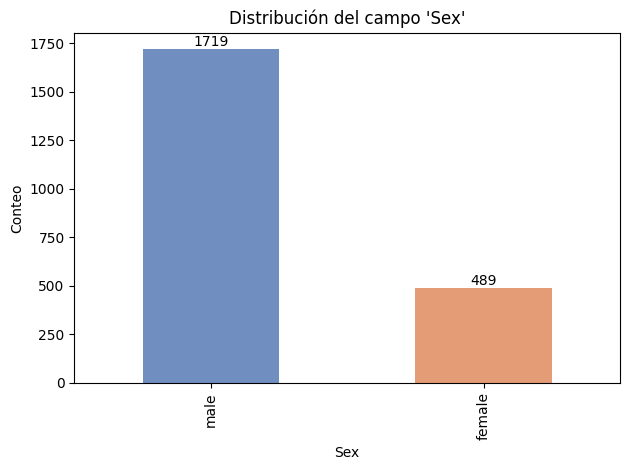

In [6]:
# Histograma (barra) del campo 'Sex' (0=female, 1=male). Maneja NaN como 'unknown'.
sex_series = dft['Sex'].map({1: 'male', 0: 'female'}).fillna('unknown')
sex_counts = sex_series.value_counts()

ax = sex_counts.plot(kind='bar', color=['#4C72B0', '#DD8452', '#55A868'][:len(sex_counts)], alpha=0.8)
ax.set_title("Distribución del campo 'Sex'")
ax.set_xlabel("Sex")
ax.set_ylabel("Conteo")

# Anotar valores encima de las barras
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10)

import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()

<Axes: >

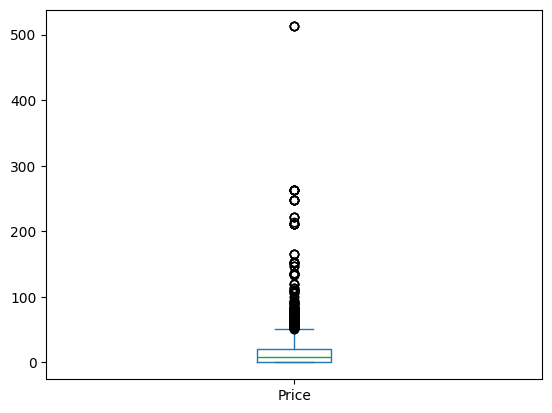

In [17]:
dft['Price'].plot(kind='box')

<Axes: >

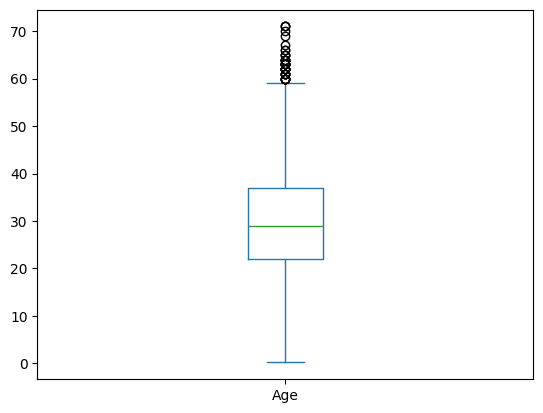

In [18]:
dft['Age'].plot(kind='box')

<Axes: xlabel='Age', ylabel='Price'>

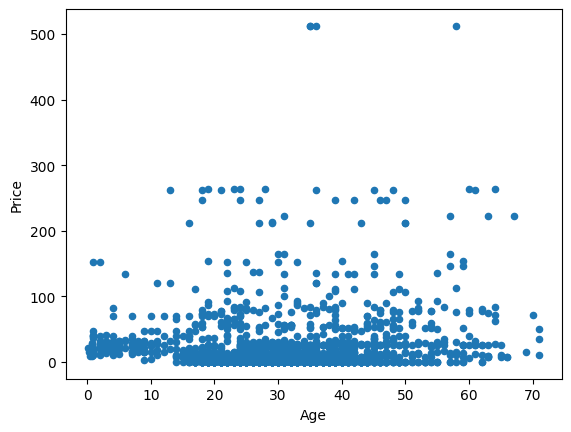

In [19]:
dft.plot(kind='scatter', x='Age', y='Price')

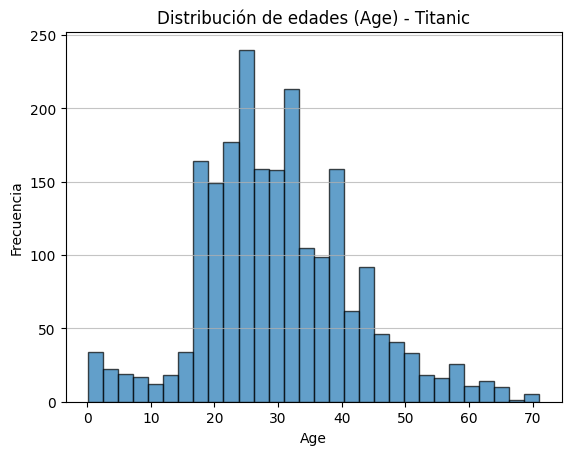

In [31]:
import matplotlib.pyplot as plt

# Histograma de la columna 'Age' (elimina NaN)
dft['Age'].dropna().plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
plt.title("Distribución de edades (Age) - Titanic")
plt.xlabel("Age")
plt.ylabel("Frecuencia")
plt.grid(axis='y', alpha=0.75)
plt.show()

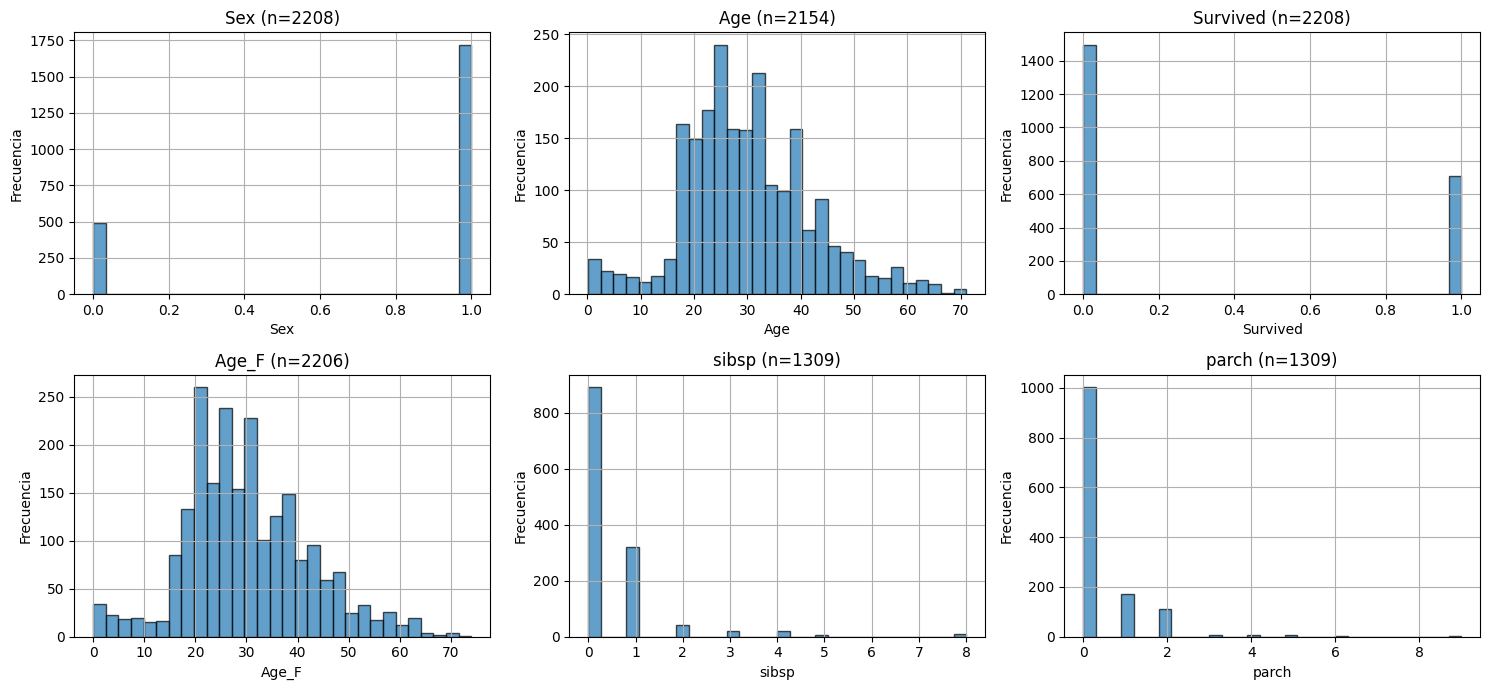

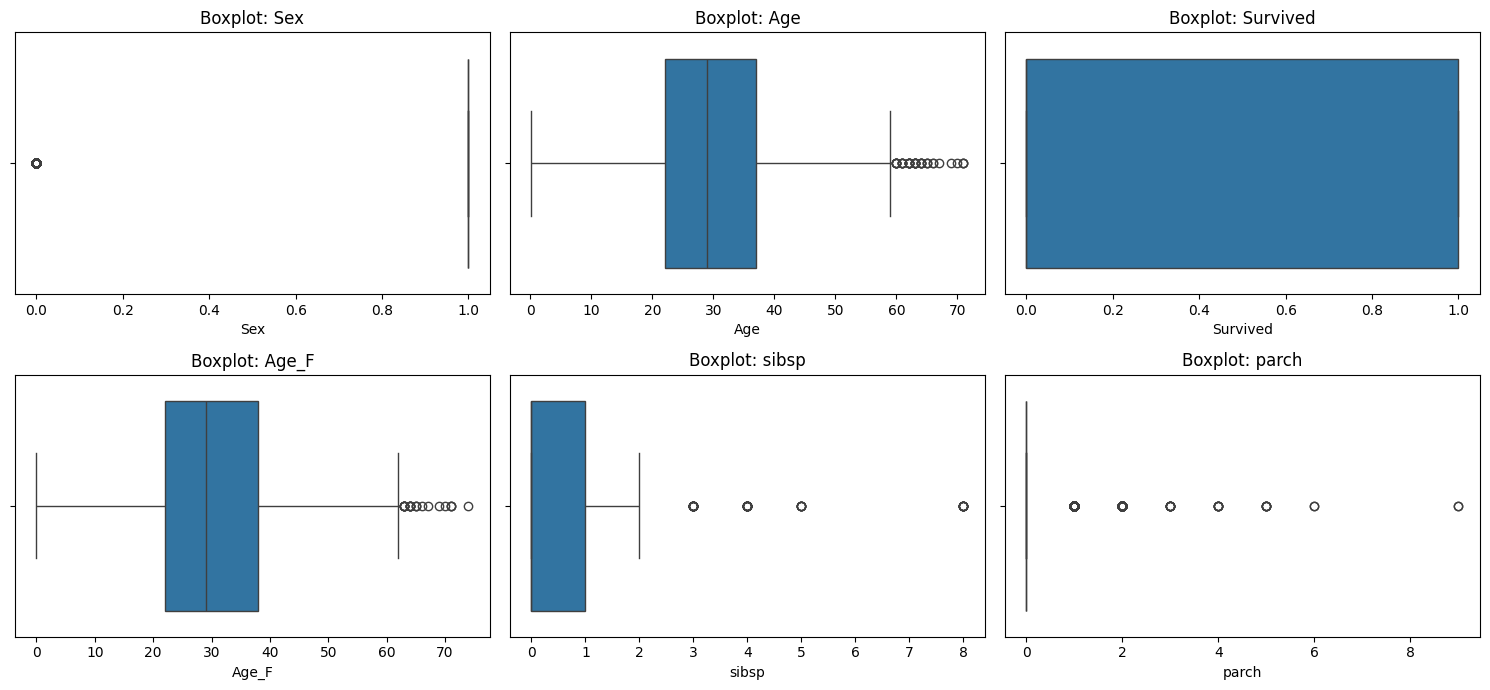

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas
numeric_cols = dft.select_dtypes(include=[np.number]).columns.tolist()

# Resumen estadístico y conteo de valores faltantes
desc = dft[numeric_cols].describe().T
missing = dft[numeric_cols].isna().sum()
skew = dft[numeric_cols].skew()
summary = desc.assign(missing=missing, skew=skew)
#print("Resumen estadístico (numéricas):")
#print(summary)

# Histogramas (grid)
n = len(numeric_cols)
cols_plot = 3
rows_plot = (n + cols_plot - 1) // cols_plot
fig, axes = plt.subplots(rows_plot, cols_plot, figsize=(cols_plot * 5, rows_plot * 3.5))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    dft[col].dropna().hist(bins=30, ax=ax, edgecolor='black', alpha=0.7)
    ax.set_title(f"{col} (n={dft[col].dropna().shape[0]})")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
fig, axes = plt.subplots(rows_plot, cols_plot, figsize=(cols_plot * 5, rows_plot * 3.5))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    sns.boxplot(x=dft[col], ax=ax)
    ax.set_title(f"Boxplot: {col}")
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()



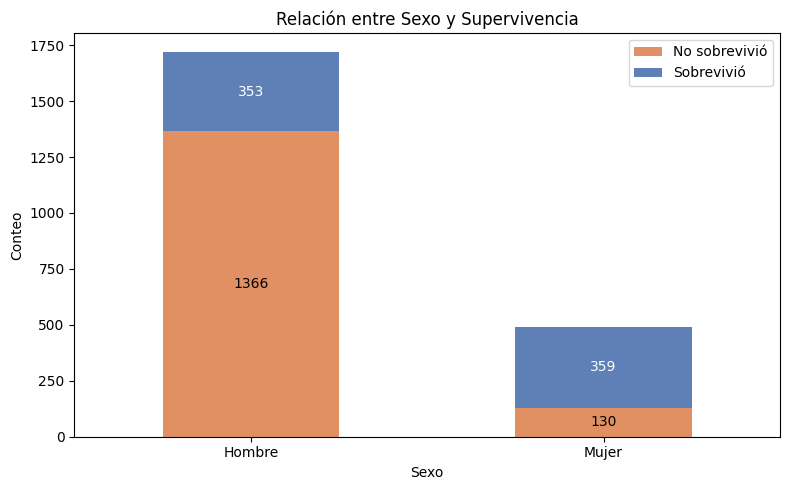

In [17]:
# Mapa 1=Hombre, 0=Mujer; incluir 'Desconocido' si hay NaN
sex_labels = dft['Sex'].map({1: 'Hombre', 0: 'Mujer'}).fillna('Desconocido')

# Tabla de contingencia Sex x Survived
ct_sex = pd.crosstab(sex_labels, dft['Survived'])

# Asegurar columnas 0 y 1 (No sobrevivió, Sobrevivió) y ordenarlas
for col in [0, 1]:
    if col not in ct_sex.columns:
        ct_sex[col] = 0
ct_sex = ct_sex[[0, 1]]
ct_sex.columns = ['No sobrevivió', 'Sobrevivió']

# Gráfico de barra apilada
ax = ct_sex.plot(kind='bar', stacked=True, color=['#DD8452', '#4C72B0'], figsize=(8, 5), alpha=0.9)
ax.set_title("Relación entre Sexo y Supervivencia")
ax.set_xlabel("Sexo")
ax.set_ylabel("Conteo")
ax.set_xticklabels(ct_sex.index, rotation=0)

# Anotar valores dentro de cada segmento
for i, idx in enumerate(ct_sex.index):
    bottom = 0
    for col in ct_sex.columns:
        val = ct_sex.loc[idx, col]
        if val > 0:
            color = 'white' if col == 'Sobrevivió' else 'black'
            ax.annotate(int(val), (i, bottom + val / 2), ha='center', va='center', fontsize=10, color=color)
        bottom += val

plt.tight_layout()
plt.show()

/var/folders/n1/zsbrkfs97sd_4fdl4mnf21g00000gn/T/ipykernel_12017/3664236467.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Survived', y='Age', data=dft, ax=axs[1], palette=['#DD8452', '#4C72B0'])
/var/folders/n1/zsbrkfs97sd_4fdl4mnf21g00000gn/T/ipykernel_12017/3664236467.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(['No sobrevivió', 'Sobrevivió'])


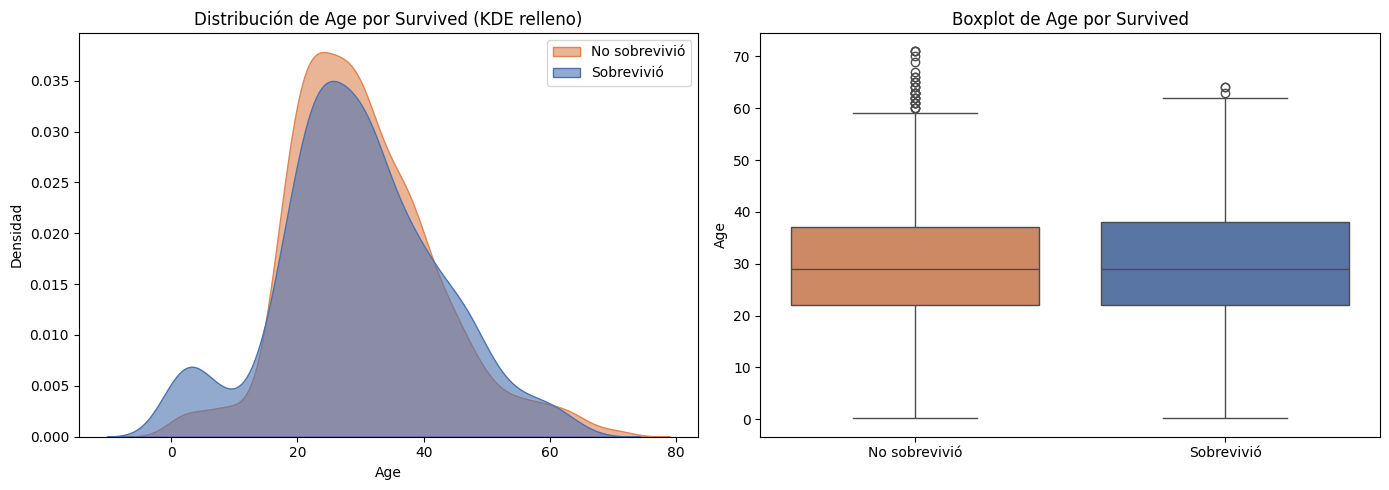

In [10]:
# Distribución (área) y boxplot lado a lado para Age vs Survived
age_no = dft.loc[dft['Survived'] == 0, 'Age'].dropna()
age_yes = dft.loc[dft['Survived'] == 1, 'Age'].dropna()

fig2, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de área (KDE relleno)
sns.kdeplot(age_no, fill=True, ax=axs[0], label='No sobrevivió', color='#DD8452', alpha=0.6)
sns.kdeplot(age_yes, fill=True, ax=axs[0], label='Sobrevivió', color='#4C72B0', alpha=0.6)
axs[0].set_title('Distribución de Age por Survived (KDE relleno)')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Densidad')
axs[0].legend()

# Boxplot
sns.boxplot(x='Survived', y='Age', data=dft, ax=axs[1], palette=['#DD8452', '#4C72B0'])
axs[1].set_xticklabels(['No sobrevivió', 'Sobrevivió'])
axs[1].set_title('Boxplot de Age por Survived')
axs[1].set_xlabel('')
axs[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

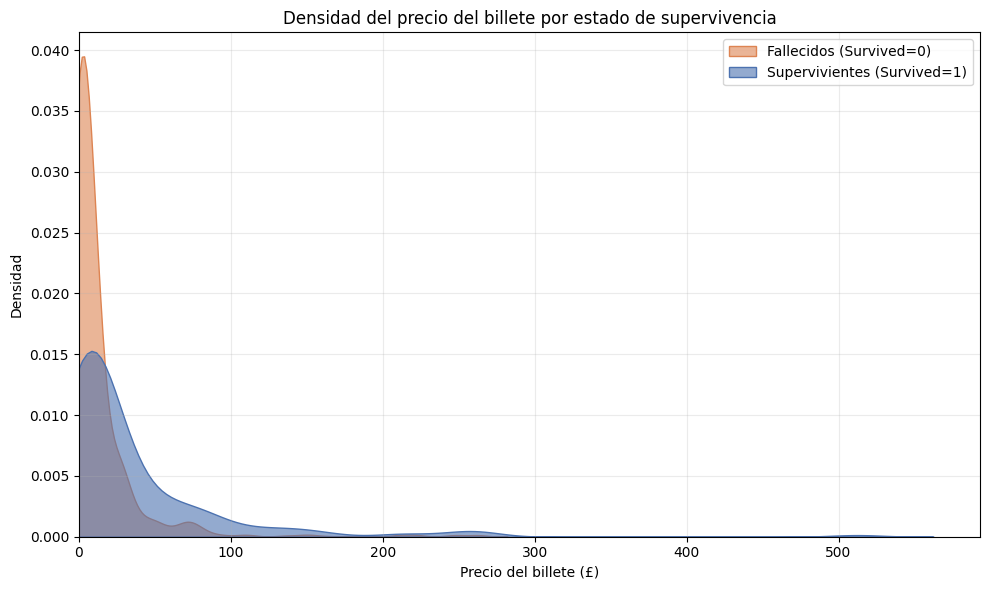

In [14]:
# Gráfico de densidad del precio del billete para supervivientes y fallecidos.
# Usa `price_to_float` si existe; crea columna 'Price_num' para no sobrescribir 'Price'.

if 'Price' not in dft.columns:
    try:
        dft['Price'] = dft['Price'].apply(price_to_float)
    except NameError:
        # Si price_to_float no existe, intentar conversión directa a float (coerce)
        dft['Price'] = pd.to_numeric(dft['Price'], errors='coerce')

price_surv = dft.loc[dft['Survived'] == 1, 'Price'].dropna()
price_dead = dft.loc[dft['Survived'] == 0, 'Price'].dropna()

if price_surv.empty and price_dead.empty:
    print("No hay valores de precio disponibles para dibujar.")
else:
    plt.figure(figsize=(10,6))
    sns.kdeplot(price_dead, fill=True, label='Fallecidos (Survived=0)', color='#DD8452', bw_method='scott', alpha=0.6)
    sns.kdeplot(price_surv, fill=True, label='Supervivientes (Survived=1)', color='#4C72B0', bw_method='scott', alpha=0.6)
    plt.xlabel('Precio del billete (£)')
    plt.ylabel('Densidad')
    plt.title('Densidad del precio del billete por estado de supervivencia')
    plt.legend()
    plt.xlim(left=0)
    plt.grid(alpha=0.25)
    plt.tight_layout()
    plt.show()

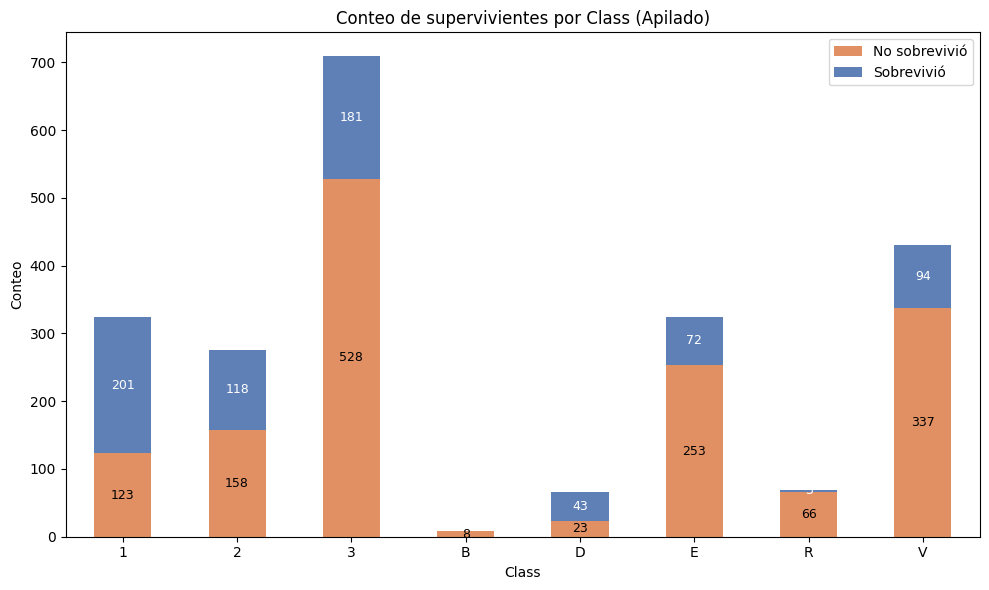

In [19]:
# Conteo de supervivientes por clase (barras apiladas)
# Usa `ct_plot` si existe, si no usa `ct`
ctp = ct_plot.copy() if 'ct_plot' in globals() else ct.copy()

# Asegurar columnas esperadas y orden
expected_cols = ['No sobrevivió', 'Sobrevivió']
for col in expected_cols:
    if col not in ctp.columns:
        ctp[col] = 0
ctp = ctp[expected_cols]

ax = ctp.plot(kind='bar', stacked=True, color=['#DD8452', '#4C72B0'], figsize=(10,6), alpha=0.9)
ax.set_title('Conteo de supervivientes por Class (Apilado)')
ax.set_xlabel('Class')
ax.set_ylabel('Conteo')
ax.set_xticklabels(ctp.index, rotation=0)

# Anotar valores dentro de cada segmento
for i, idx in enumerate(ctp.index):
    bottom = 0
    for col in ctp.columns:
        val = ctp.loc[idx, col]
        if val > 0:
            text_color = 'white' if col == 'Sobrevivió' else 'black'
            ax.annotate(int(val), (i, bottom + val/2), ha='center', va='center', fontsize=9, color=text_color)
        bottom += val

plt.tight_layout()
plt.show()